This project performs a comprehensive Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset obtained from Kaggle.
The goal is to understand Netflix’s content distribution, trends over time, geographical reach, genres, ratings, and other key characteristics using data cleaning and visualization techniques.


### Importing the dataset and libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Dataset inspection

In [7]:
df.shape

(8807, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [10]:
df.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
(df.isnull().sum() / len(df)) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

/var/folders/nl/w1x4sy_x4lg7hflv435g1nph0000gn/T/ipykernel_61957/1828748275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/var/folders/nl/w1x4sy_x4lg7hflv435g1nph0000gn/T/ipykernel_61957/1828748275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [16]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [17]:
df[['date_added', 'year_added', 'month_added']].head()

,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


### Visualization

In [18]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

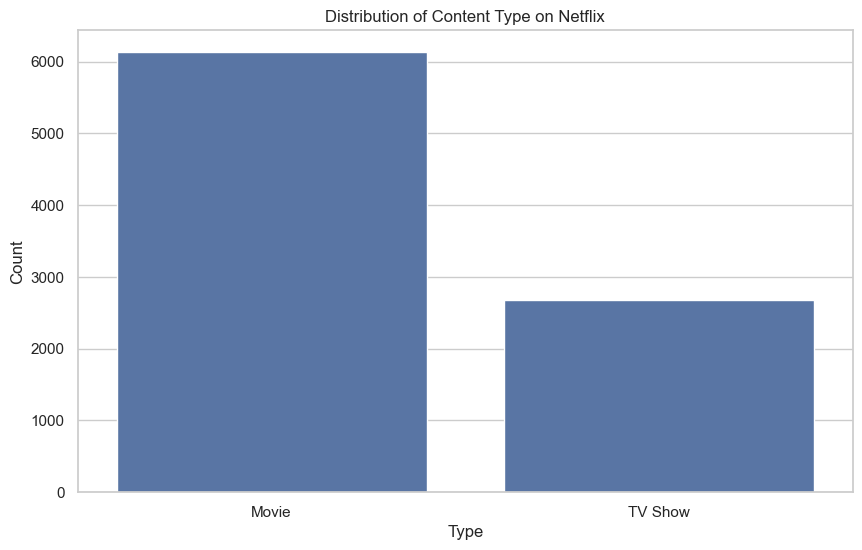

In [19]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [20]:
content_per_year = df['year_added'].value_counts().sort_index()
content_per_year

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

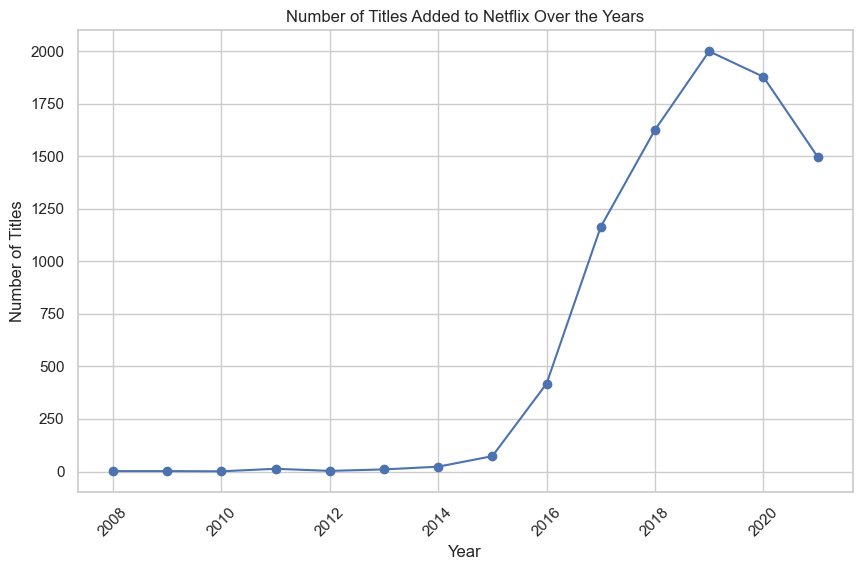

In [21]:
plt.plot(content_per_year.index, content_per_year.values, marker='o')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [22]:
year_type_count = df.groupby(['year_added', 'type']).size().unstack()
year_type_count

type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN
2011.0,13.0,NaN
2012.0,3.0,NaN
2013.0,6.0,4.0
2014.0,19.0,4.0
2015.0,56.0,17.0
2016.0,253.0,165.0


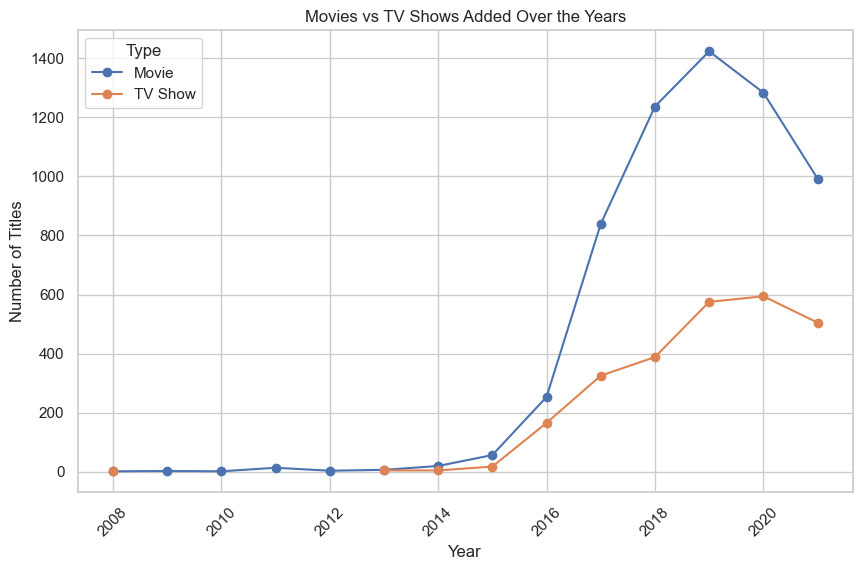

In [23]:
year_type_count.plot(marker='o')
plt.title('Movies vs TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

In [24]:
country_df = df['country'].str.split(', ').explode()

In [25]:
top_countries = country_df.value_counts().head(10)
top_countries

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64

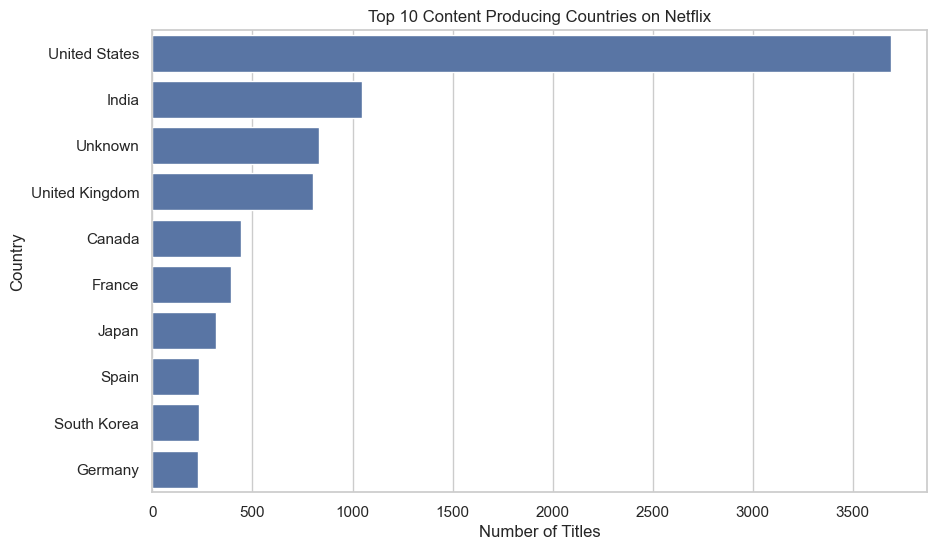

In [26]:
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [27]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

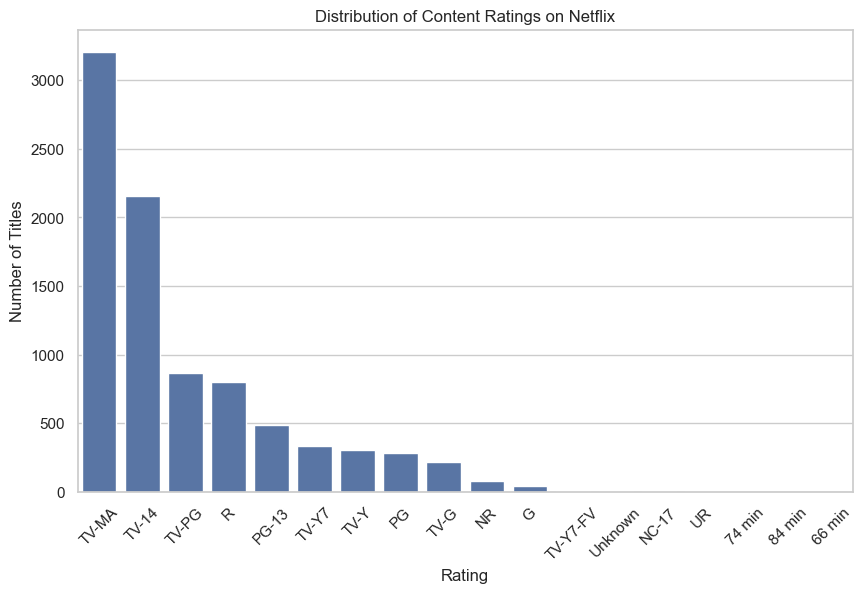

In [28]:
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [29]:
df[['duration_value', 'duration_unit']] = df['duration'].str.split(' ', n=1, expand=True)

df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

df[['duration', 'duration_value', 'duration_unit']].head()

,duration,duration_value,duration_unit
0,90 min,90.0,min
1,2 Seasons,2.0,Seasons
2,1 Season,1.0,Season
3,1 Season,1.0,Season
4,2 Seasons,2.0,Seasons


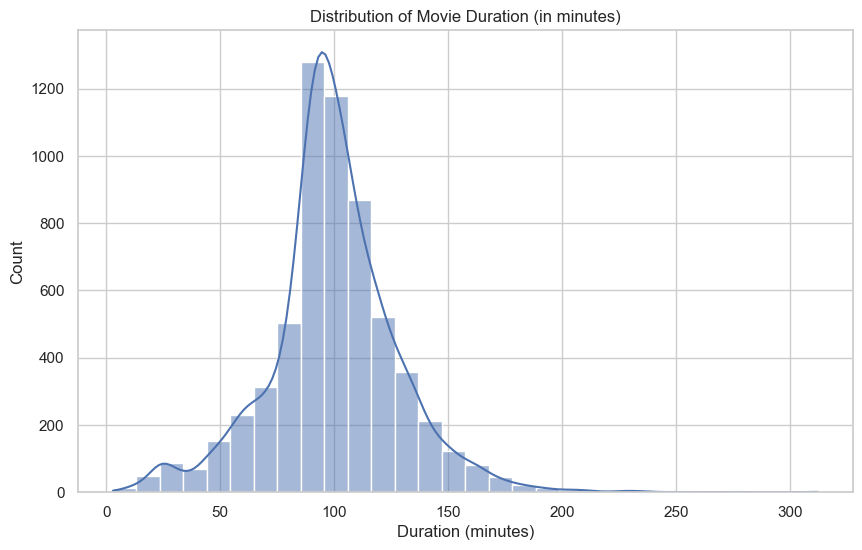

In [30]:
movies = df[df['type'] == 'Movie']

sns.histplot(movies['duration_value'], bins=30, kde=True)
plt.title('Distribution of Movie Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

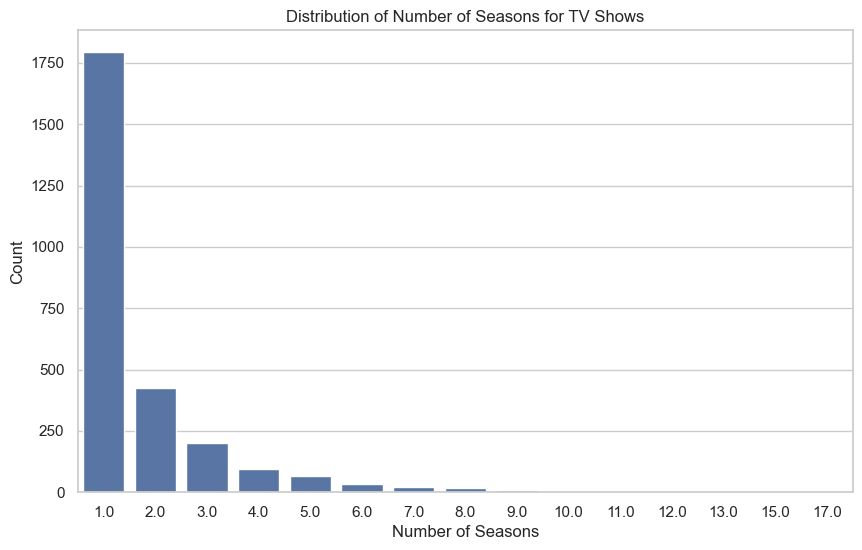

In [31]:
tv_shows = df[df['type'] == 'TV Show']

sns.countplot(x='duration_value', data=tv_shows)
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

In [32]:
genres = df['listed_in'].str.split(', ').explode()

In [33]:
top_genres = genres.value_counts().head(10)
top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

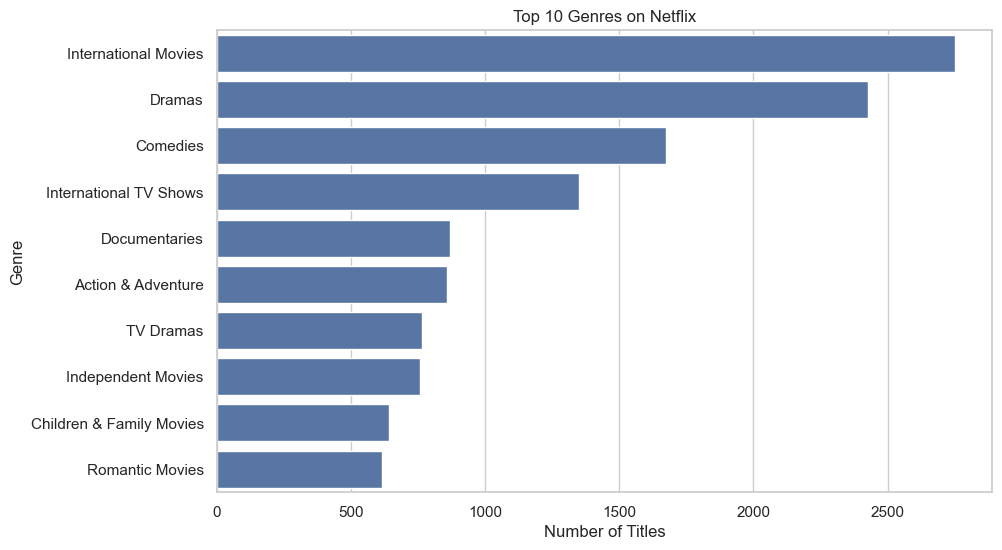

In [34]:
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [35]:
directors = df[df['director'] != 'Unknown']['director']

In [36]:
top_directors = directors.value_counts().head(10)
top_directors

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

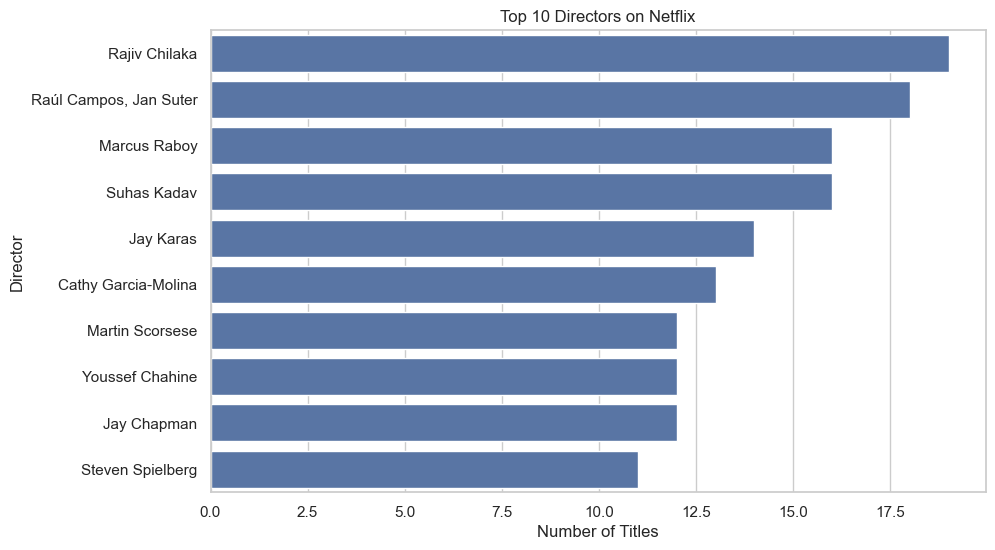

In [37]:
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [38]:
cast_series = df[df['cast'] != 'Unknown']['cast']
cast_exploded = cast_series.str.split(', ').explode()

In [39]:
top_cast = cast_exploded.value_counts().head(10)
top_cast

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

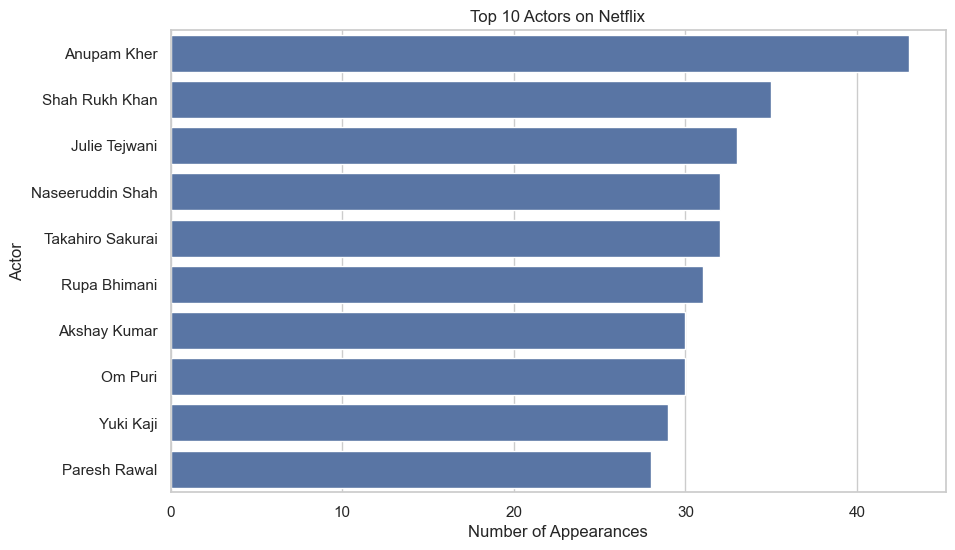

In [40]:
sns.barplot(x=top_cast.values, y=top_cast.index)
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

In [41]:
numeric_df = df[['release_year', 'year_added', 'duration_value']]

In [42]:
corr_matrix = numeric_df.corr()
corr_matrix

,release_year,year_added,duration_value
release_year,1.000000,0.110473,-0.249182
year_added,0.110473,1.000000,0.016436
duration_value,-0.249182,0.016436,1.000000


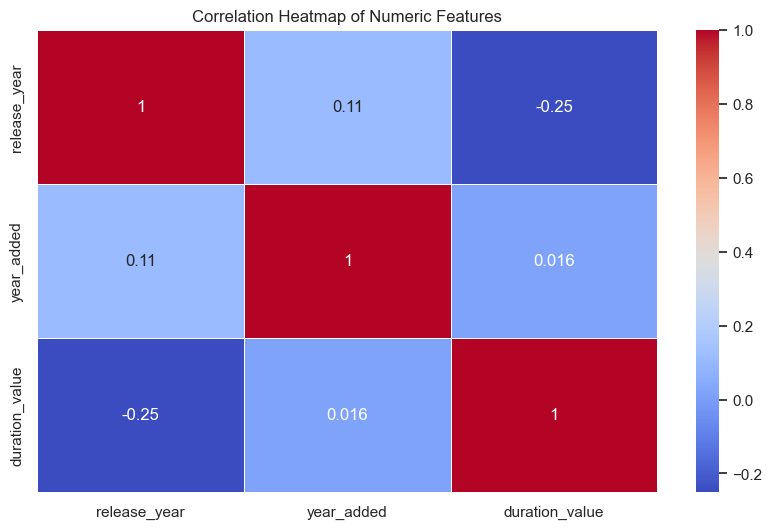

In [43]:
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [44]:
month_counts = df['month_added'].value_counts().sort_index()
month_counts

month_added
1.0     727
2.0     557
3.0     734
4.0     759
5.0     626
6.0     724
7.0     819
8.0     749
9.0     765
10.0    755
11.0    697
12.0    797
Name: count, dtype: int64

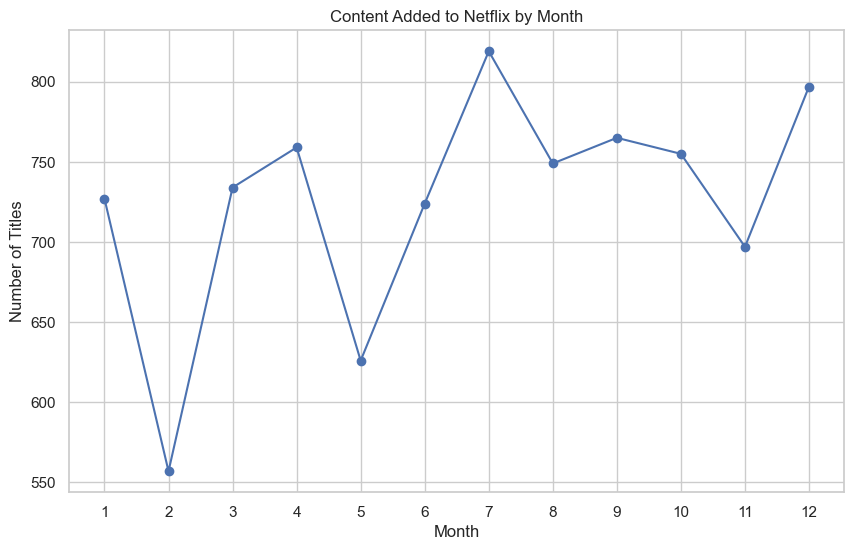

In [45]:
plt.plot(month_counts.index, month_counts.values, marker='o')
plt.title('Content Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(range(1, 13))
plt.show()

In [46]:
genre_type_df = df[['type', 'listed_in']].copy()
genre_type_df['listed_in'] = genre_type_df['listed_in'].str.split(', ')
genre_type_df = genre_type_df.explode('listed_in')

In [47]:
genre_type_pivot = pd.pivot_table(
    genre_type_df,
    index='listed_in',
    columns='type',
    aggfunc='size',
    fill_value=0
)

top_genre_type = genre_type_pivot.sum(axis=1).sort_values(ascending=False).head(10)
genre_type_pivot = genre_type_pivot.loc[top_genre_type.index]

genre_type_pivot

type,Movie,TV Show
listed_in,,
International Movies,2752,0
Dramas,2427,0
Comedies,1674,0
International TV Shows,0,1351
Documentaries,869,0
Action & Adventure,859,0
TV Dramas,0,763
Independent Movies,756,0
Children & Family Movies,641,0


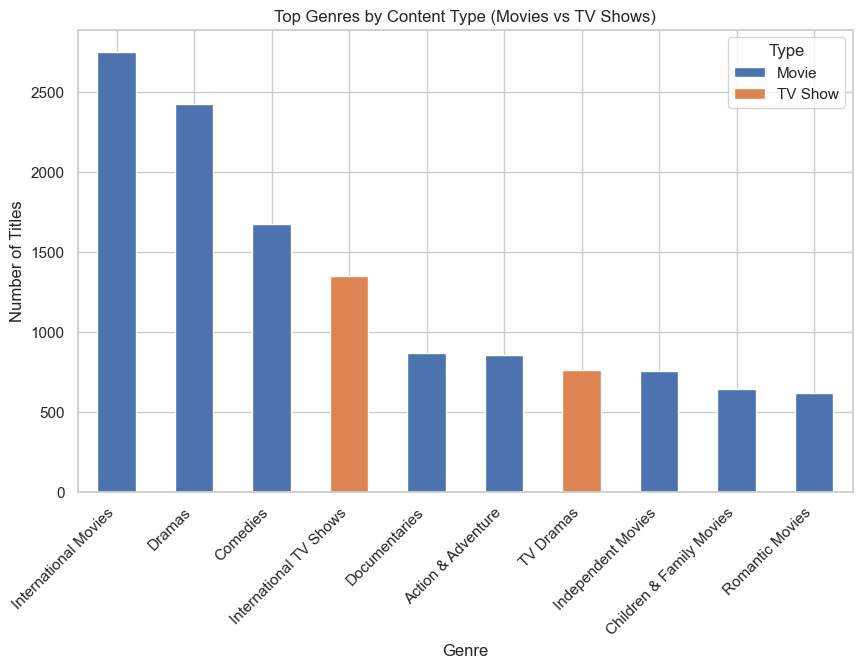

In [48]:
genre_type_pivot.plot(
    kind='bar',
    stacked=True
)

plt.title('Top Genres by Content Type (Movies vs TV Shows)')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.show()

In [49]:
country_type_df = df[['type', 'country']].copy()
country_type_df['country'] = country_type_df['country'].str.split(', ')
country_type_df = country_type_df.explode('country')

In [50]:
country_type_pivot = pd.pivot_table(
    country_type_df,
    index='country',
    columns='type',
    aggfunc='size',
    fill_value=0
)

top_countries = country_type_pivot.sum(axis=1).sort_values(ascending=False).head(10)
country_type_pivot = country_type_pivot.loc[top_countries.index]

country_type_pivot

type,Movie,TV Show
country,,
United States,2751,938
India,962,84
Unknown,440,391
United Kingdom,532,272
Canada,319,126
France,303,90
Japan,119,199
Spain,171,61
South Korea,61,170


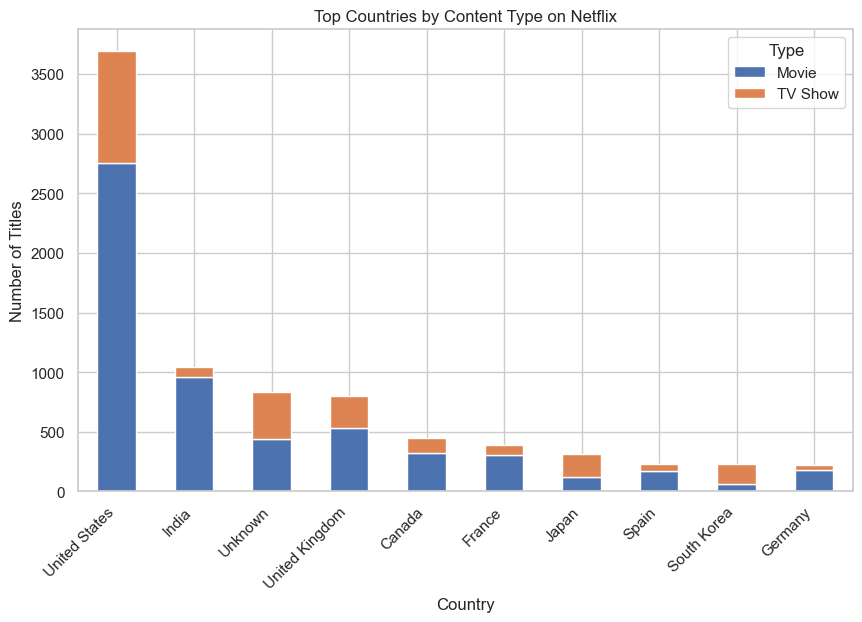

In [51]:
country_type_pivot.plot(
    kind='bar',
    stacked=True
)

plt.title('Top Countries by Content Type on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.show()

### IQR

In [52]:
df_movies = df[df['type'] == 'Movie'].copy()

df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '', regex=False)
df_movies['duration_minutes'] = pd.to_numeric(df_movies['duration_minutes'], errors='coerce')

df_movies.dropna(subset=['duration_minutes'], inplace=True)

In [53]:
Q1 = df_movies['duration_minutes'].quantile(0.25)
Q2 = df_movies['duration_minutes'].quantile(0.50)  # Median
Q3 = df_movies['duration_minutes'].quantile(0.75)

Q1, Q2, Q3

(np.float64(87.0), np.float64(98.0), np.float64(114.0))

In [54]:
IQR = Q3 - Q1
IQR

np.float64(27.0)

In [55]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(46.5), np.float64(154.5))

In [56]:
outliers = df_movies[
    (df_movies['duration_minutes'] < lower_bound) |
    (df_movies['duration_minutes'] > upper_bound)
]

outliers[['title', 'duration_minutes']].head()

,title,duration_minutes
22,Avvai Shanmughi,161.0
24,Jeans,166.0
45,My Heroes Were Cowboys,23.0
71,A StoryBots Space Adventure,13.0
73,King of Boys,182.0


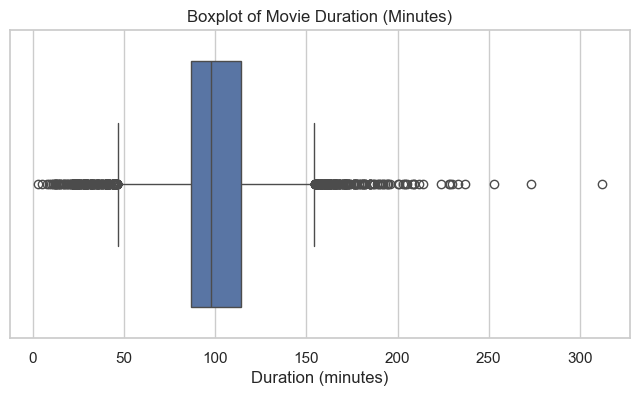

In [57]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_movies['duration_minutes'])
plt.title("Boxplot of Movie Duration (Minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

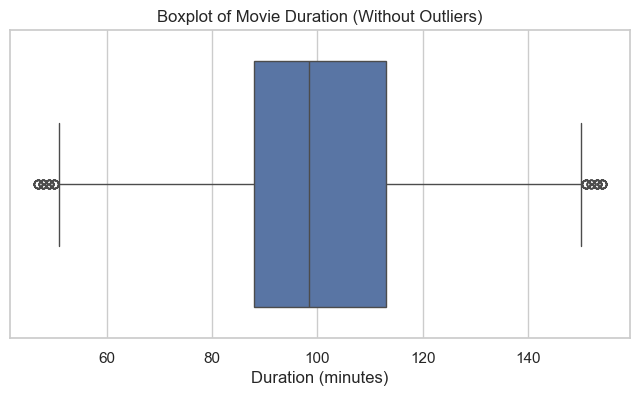

In [58]:
filtered_movies = df_movies[
    (df_movies['duration_minutes'] >= lower_bound) &
    (df_movies['duration_minutes'] <= upper_bound)
]

plt.figure(figsize=(8,4))
sns.boxplot(x=filtered_movies['duration_minutes'])
plt.title("Boxplot of Movie Duration (Without Outliers)")
plt.xlabel("Duration (minutes)")
plt.show()

In [59]:
df_movies['duration_minutes'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

0.25     87.0
0.50     98.0
0.75    114.0
0.90    133.0
0.95    147.0
Name: duration_minutes, dtype: float64